# Planetary Microlensing

## Caustiscs and critical lines: from large to small $q$

It is interesting to visualize how the shape of the caustics and of the critical lines changes as a function of $q$. First, we will focus on the central caustic. We will employ methods used in Lecture 17. The ```binary_lens``` class is now included into the microlensing module, which we will import in this notebook. 

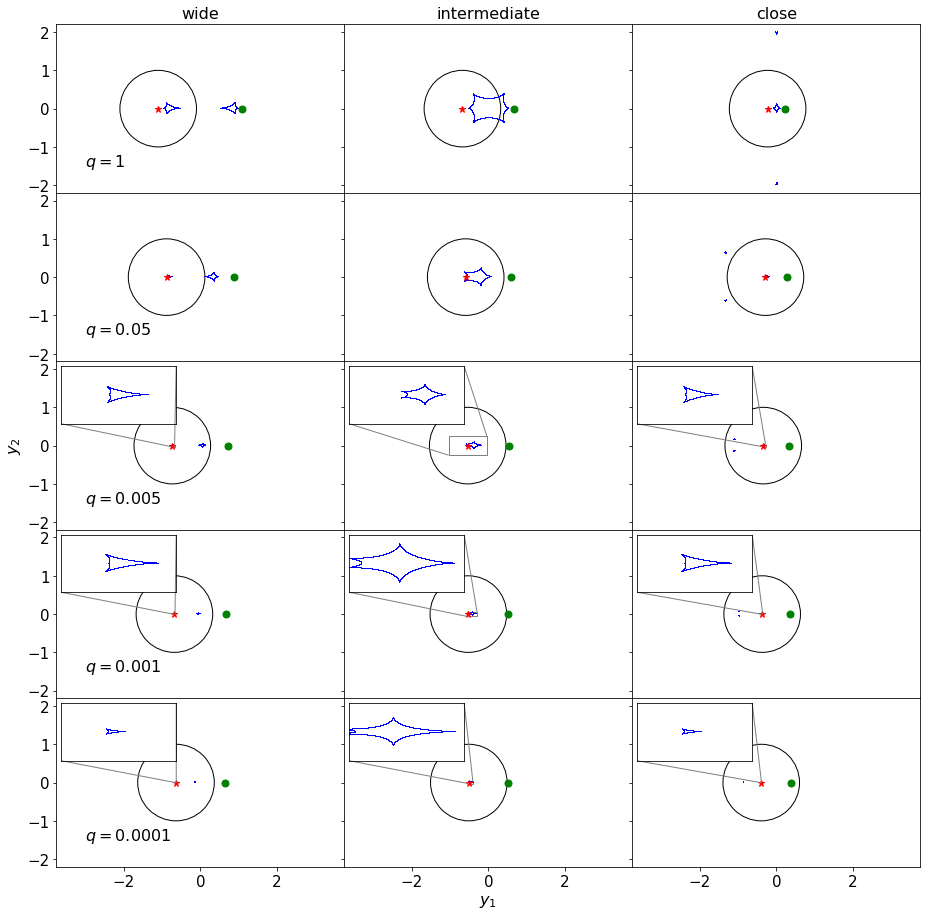

In [1]:
"""
import the relevant modules and classes
"""
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import microlensing as ml
from mpl_toolkits.axes_grid.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

"""
creating a plot with 5 rows and 3 columns of panels
"""
nq=5
nd=3


"""
setting up the values for q
"""
q=[1.0,0.05,0.005,0.001,0.0001]#np.logspace(0.,-3.,nq)

"""
setting up the figure and the axes
"""
fig,ax=plt.subplots(len(q),nd,figsize=(15,15),sharex=True,sharey=True)
desired_box_ratioN=0.5
xlim=np.array([-4.4,4.4])
ylim=xlim/2.0

"""
loop over q
"""

ps=ml.point_source(ds=8) # set up a point source at ds=8

for j in range(nq):

    m2=1.0
    m1=m2*q[j]
    mtot=m1+m2
    """
    the first, second, and third column will show examples of wide, intermediate,
    and close caustic topologies, respectively. Calculate d values accordingly
    """
    dwi=((m1/mtot)**(1./3.)+(m2/mtot)**(1./3.))**(3./2.)
    dic=((m1/mtot)**(1./3.)+(m2/mtot)**(1./3.))**(-3./4.)

    d=np.array([dwi+0.2,0.5*(dwi+dic),1.0/(dwi+0.2)])

    """
    loop over d
    """
    for i in range(nd):
        bl=ml.binary_lens(ps=ps,m1=1.0,q=q[j],d=d[i])
        x1,x2,xs1,xs2=bl.CritCau()
        
        # the positions of the two lenses
        z1=bl.getPos()
        z2=-z1

        ax[j,i].plot(xs1,xs2,',',color='blue')
        ax[j,i].plot([z2.real],[z2.imag],'*',markersize=7,color='red')
        ax[j,i].plot([z1.real],[z1.imag],'o',markersize=7,color='green')
        
    
        ax[j,i].xaxis.set_tick_params(labelsize=15)
        ax[j,i].yaxis.set_tick_params(labelsize=15)    
        
        ax[j,i].set_xlim(xlim)
        ax[j,i].set_ylim(ylim)
    
        ax[j,i].set(aspect=1)
        ax[j,i].set(aspect=1)
        
        circle=plt.Circle((z2.real,z2.imag),1,color='black',fill=False)
        ax[j,i].add_artist(circle)

        """
        Place insets in the panels where the central caustic is too hard to be seen
        """
        if (j>1) and (i != 1):
            axins = zoomed_inset_axes(ax[j,i], 30*(j-1)**2, loc=2)
            xlim_z=np.array([-0.05/(j-1)**2,0.05/(j-1)**2])
            ylim_z=xlim_z/2.0
            xlim_z=np.array([-0.05/(j-1)**2,0.05/(j-1)**2])+0.01/(j-1)**2
            xlim_z=xlim_z-z1.real
            ylim_z=ylim_z-z1.imag
            axins.set_xlim(xlim_z)
            axins.set_ylim(ylim_z)
            axins.set(aspect=1)
            axins.plot(xs1,xs2,',',color='blue')
            axins.set_xticks([])
            axins.set_yticks([])
            mark_inset(ax[j,i], axins, loc1=1, loc2=3, fc="none", ec="0.5")
            
        if (j>1) and (i == 1):
            axins = zoomed_inset_axes(ax[j,i], 3*(j-1)**2, loc=2)
            xlim_z=np.array([-0.5/(j-1)**2,0.5/(j-1)**2])
            ylim_z=xlim_z/2.0
            if j==3:
                xlim_z=xlim_z+0.1
            if j==4:
                xlim_z=xlim_z+0.05
            xlim_z=xlim_z-z1.real
            ylim_z=ylim_z-z1.imag                
            axins.set_xlim(xlim_z)
            axins.set_ylim(ylim_z)
            axins.set(aspect=1)
            axins.plot(xs1,xs2,',',color='blue')
            axins.set_xticks([])
            axins.set_yticks([])
            mark_inset(ax[j,i], axins, loc1=1, loc2=3, fc="none", ec="0.5")
    
fig.subplots_adjust(left=0.1,bottom=0.1)
fig.subplots_adjust(hspace=0,wspace=0)  

ax[0,0].set_title('wide',fontsize=16)
ax[0,1].set_title('intermediate',fontsize=16)
ax[0,2].set_title('close',fontsize=16)

ax[0,0].text(-3,-1.5,'$q=1$',fontsize=16)
ax[1,0].text(-3,-1.5,'$q=0.05$',fontsize=16)
ax[2,0].text(-3,-1.5,'$q=0.005$',fontsize=16)
ax[3,0].text(-3,-1.5,'$q=0.001$',fontsize=16)
ax[4,0].text(-3,-1.5,'$q=0.0001$',fontsize=16)

ax[4,1].set_xlabel('$y_1$',fontsize=16)
ax[2,0].set_ylabel('$y_2$',fontsize=16)
fig.savefig('binary_toplanet.png')

# Light curves in planetary microlensing events

This example shows how to plot the light-curve of a planetary microlensing event. We set up a binary lens and a trajectory for the source with respect to the lens. Then we compute the images of the binary lens and their magnification. We display the result in three panels. On the left panel, we show the Einstein radius of the lens and the trajectory of the source.  In the middle panel, we zoom over the caustic responsible of the planetary anomaly in the light curve. In the right panel, we display the light-curve.

## Central caustic perturbations
In both the wide and the close caustic configurations, the primary caustic (or central caustic) has an arrow-head shape, with the tip of the arrow pointing towards the planet.

Let's consider what kind of perturbations this particular caustic shape produces on the light curve of a source passing close to the star.

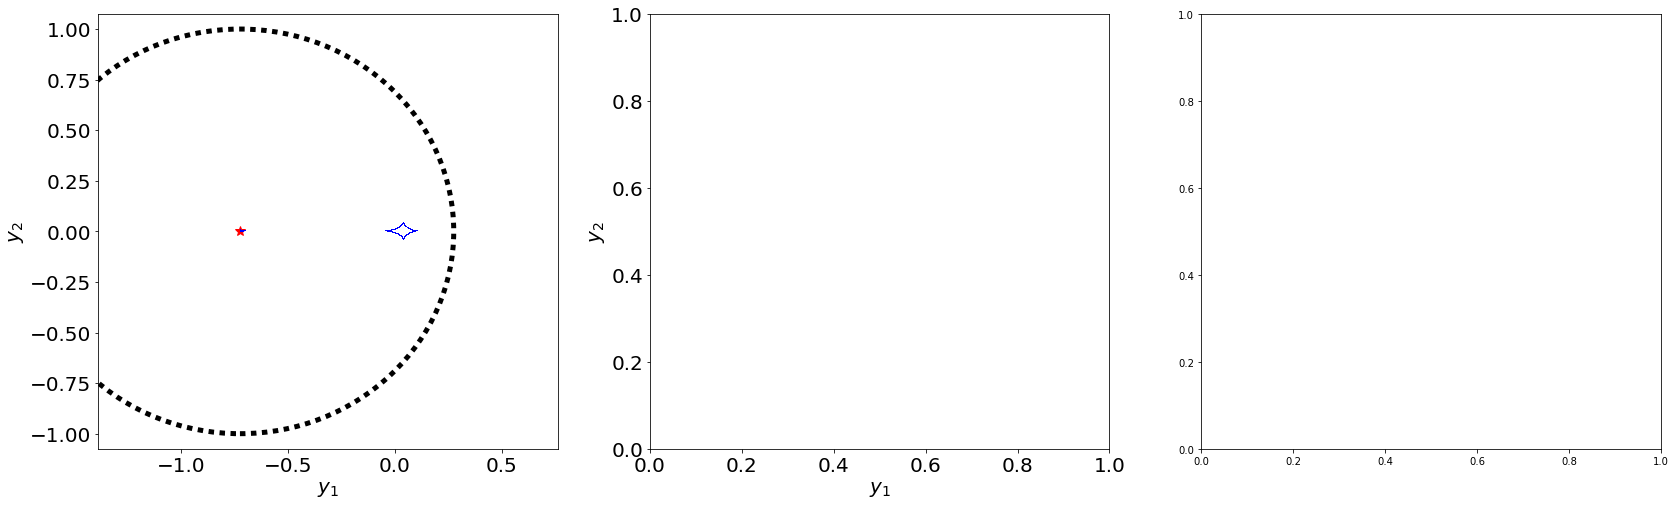

In [16]:
"""
import the relevant modules and classes
"""
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import microlensing as ml

"""
set up the figure
"""
fig,ax=plt.subplots(1,3,figsize=(28,8))

"""
build the binary lens
"""
y0=0.1
t0=0.0
ps=ml.point_source(ds=8)
bl=ml.binary_lens(ps=ps,m1=1.0,dl=5.0,q=0.003,d=1.45,y0=y0,t0=t0)

"""
The binary lens class is constructed such that the impact parameter y0 is not the minimal distance 
of the source from the star, but from the midpoint between the star and the planet.
To center the light curve on the time of minimam distance between the star and the source, we will
need to apply a correction, as shown below.
"""

"""
Compute the caustics of the lens and draw the source trajectory in the left panel
"""
x1c,x2c,y1c,y2c=bl.CritCau()
ax[0].plot(y1c,y2c,',',color='blue')

"""
set dimensions of source plane plotting area
"""
xmin=np.amin(y1c)
xmax=np.amax(y1c)
ymin=np.amin(y2c)
ymax=np.amax(y2c)
dim=[xmax-xmin,ymax-ymin]
if (dim[0]>dim[1]):
    side=dim[0]*2.6
else:
    side=dim[1]*2.6
    
"""
show the Einstein radius
"""
z_2=-bl.getPos()
ax[0].plot([z_2.real],[z_2.imag],'*',markersize=10,color='red',zorder=-10)
circle=plt.Circle((z_2.real,z_2.imag),1.0,color='black',fill=False,ls=':',lw=5)
ax[0].add_artist(circle)
    
xmin_=0.5*(xmin+xmax)-side/2.0
xmax_=0.5*(xmin+xmax)+side/2.0
ymin_=0.5*(ymin+ymax)-side/2.0
ymax_=0.5*(ymin+ymax)+side/2.0

ax[0].set_xlim([xmin_,xmax_])
ax[0].set_ylim([ymin_,ymax_])
ax[0].xaxis.set_tick_params(labelsize=20)
ax[0].yaxis.set_tick_params(labelsize=20)
ax[1].xaxis.set_tick_params(labelsize=20)
ax[1].yaxis.set_tick_params(labelsize=20)    

ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)     
ax[1].set_xlabel('$y_1$',fontsize=20)
ax[1].set_ylabel('$y_2$',fontsize=20)